<a href="https://colab.research.google.com/github/pragmatizt/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/LS_DS_112_Loading_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading Datasets

This assignment is purposely semi-open-ended you will be asked to load datasets both from github and also from CSV files from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Remember that the UCI datasets may not have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally, on github, using the `!curl` shell command, or in some other way before you try and read it in as a dataframe, this will help you catch what would otherwise be unforseen problems.


## 1) Load a dataset from Github (via its *RAW* URL)

Pick a dataset from the following repository and load it into Google Colab. Make sure that the headers are what you would expect and check to see if missing values have been encoded as NaN values:

<https://github.com/ryanleeallred/datasets>

In [0]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed
import pandas as pd
import numpy as np

cancer_data_url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv'


In [0]:
!curl https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv | wc

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  122k  100  122k    0     0  1608k      0 --:--:-- --:--:-- --:--:-- 1608k
    569     573  125204


In [0]:
cancer_data = pd.read_csv(cancer_data_url)

cancer_data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [0]:
cancer_data.count()

id                         569
diagnosis                  569
radius_mean                569
texture_mean               569
perimeter_mean             569
area_mean                  569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave points_mean        569
symmetry_mean              569
fractal_dimension_mean     569
radius_se                  569
texture_se                 569
perimeter_se               569
area_se                    569
smoothness_se              569
compactness_se             569
concavity_se               569
concave points_se          569
symmetry_se                569
fractal_dimension_se       569
radius_worst               569
texture_worst              569
perimeter_worst            569
area_worst                 569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
Unnamed:

## 2) Load a dataset from your local machine
Download a dataset from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) and then upload the file to Google Colab either using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

While you are free to try and load any dataset from the UCI repository, I strongly suggest starting with one of the most popular datasets like those that are featured on the right-hand side of the home page. 

Some datasets on UCI will have challenges associated with importing them far beyond what we have exposed you to in class today, so if you run into a dataset that you don't know how to deal with, struggle with it for a little bit, but ultimately feel free to simply choose a different one. 

- Make sure that your file has correct headers, and the same number of rows and columns as is specified on the UCI page. If your dataset doesn't have headers use the parameters of the `read_csv` function to add them. Likewise make sure that missing values are encoded as `NaN`.

In [0]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

from google.colab import files
uploaded = files.upload()

In [0]:
heart_data = pd.read_csv('processed.switzerland.data')
heart_data.shape

(122, 14)

In [0]:
heart_data.head()

,32,1,1.1,95,0,?,0.1,127,0.2,.7,1.2,?.1,?.2,1.3
0,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
1,35,1,4,?,0,?,0,130,1,?,?,?,7,3
2,36,1,4,110,0,?,0,125,1,1,2,?,6,1
3,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2
4,38,0,4,110,0,0,0,156,0,0,2,?,3,1


In [0]:
# Let's add column headers here:
column_headers = ['age', 'sex', 'cp', 'tresbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

df = pd.read_csv('processed.switzerland.data', names=column_headers, na_values="?")

"""
3 age: age in years 
4 sex: sex (1 = male; 0 = female) 
9 cp: chest pain type 
-- Value 1: typical angina 
-- Value 2: atypical angina 
-- Value 3: non-anginal pain 
-- Value 4: asymptomatic 
10 trestbps: resting blood pressure (in mm Hg on admission to the hospital) 
12 chol: serum cholestoral in mg/dl 
16 fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
19 restecg: resting electrocardiographic results 
-- Value 0: normal 
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
32 thalach: maximum heart rate achieved 
38 exang: exercise induced angina (1 = yes; 0 = no) 
40 oldpeak = ST depression induced by exercise relative to rest 
41 slope: the slope of the peak exercise ST segment 
-- Value 1: upsloping 
-- Value 2: flat 
-- Value 3: downsloping 
44 ca: number of major vessels (0-3) colored by flourosopy 
51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
58 num: diagnosis of heart disease (angiographic disease status) 
-- Value 0: < 50% diameter narrowing 
-- Value 1: > 50% diameter narrowing 
"""

"\n3 age: age in years \n4 sex: sex (1 = male; 0 = female) \n9 cp: chest pain type \n-- Value 1: typical angina \n-- Value 2: atypical angina \n-- Value 3: non-anginal pain \n-- Value 4: asymptomatic \n10 trestbps: resting blood pressure (in mm Hg on admission to the hospital) \n12 chol: serum cholestoral in mg/dl \n16 fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) \n19 restecg: resting electrocardiographic results \n-- Value 0: normal \n-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) \n-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria \n32 thalach: maximum heart rate achieved \n38 exang: exercise induced angina (1 = yes; 0 = no) \n40 oldpeak = ST depression induced by exercise relative to rest \n41 slope: the slope of the peak exercise ST segment \n-- Value 1: upsloping \n-- Value 2: flat \n-- Value 3: downsloping \n44 ca: number of major vessels (0-3) colored by flourosopy

In [0]:
df.head()

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32,1,1,95.0,0,NaN,0.0,127.0,0.0,0.7,1.0,NaN,NaN,1
1,34,1,4,115.0,0,NaN,NaN,154.0,0.0,0.2,1.0,NaN,NaN,1
2,35,1,4,NaN,0,NaN,0.0,130.0,1.0,NaN,NaN,NaN,7.0,3
3,36,1,4,110.0,0,NaN,0.0,125.0,1.0,1.0,2.0,NaN,6.0,1
4,38,0,4,105.0,0,NaN,0.0,166.0,0.0,2.8,1.0,NaN,NaN,2


In [0]:
# Keeping this here to remember where I got stuck -- I expected there to be a space before " ?", there wasn't.
#df = df.replace(" ?", np.NaN)
#df.head()

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32,1,1,95,0,?,0,127,0,.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2


In [0]:
df['fbs'].iloc[2]


'?'

In [0]:
# Turns out, opposite of the lecture, no space on this one before the question mark!
df = df.replace("?", np.NaN)
df.head()

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32,1,1,95,0,NaN,0,127,0,.7,1,NaN,NaN,1
1,34,1,4,115,0,NaN,NaN,154,0,.2,1,NaN,NaN,1
2,35,1,4,NaN,0,NaN,0,130,1,NaN,NaN,NaN,7,3
3,36,1,4,110,0,NaN,0,125,1,1,2,NaN,6,1
4,38,0,4,105,0,NaN,0,166,0,2.8,1,NaN,NaN,2


## 3) Load a dataset from UCI using `!wget`

"Shell Out" and try loading a file directly into your google colab's memory using the `!wget` command and then read it in with `read_csv`.

With this file we'll do a bit more to it.

- Read it in, fix any problems with the header as make sure missing values are encoded as `NaN`.
- Use the `.fillna()` method to fill any missing values. 
 - [.fillna() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
- Create one of each of the following plots using the Pandas plotting functionality:
 - Scatterplot
 - Histogram
 - Density Plot


In [0]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data

In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data

--2019-08-06 20:56:50--  https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10263 (10K) [application/x-httpd-php]
Saving to: ‘processed.hungarian.data.4’

processed.hungarian 100%[===================>]  10.02K  --.-KB/s    in 0s      

2019-08-06 20:56:51 (69.3 MB/s) - ‘processed.hungarian.data.4’ saved [10263/10263]



In [0]:
column_headers_2 = ['age', 'sex', 'cp', 'tresbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df2 = pd.read_csv('processed.hungarian.data', names=column_headers_2, na_values="?")
print(df2.shape);



(294, 14)


In [0]:
df2.head()

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0


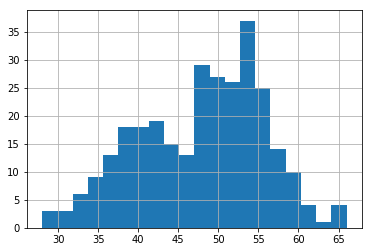

In [0]:
# Histogram for Hungarian Data set. n=294
df2['age'].hist(bins=20);

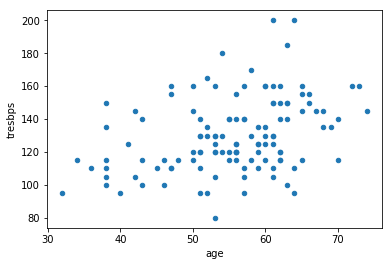

In [0]:
# Scatter Plot - Switzerland
df.plot.scatter('age', 'tresbps');

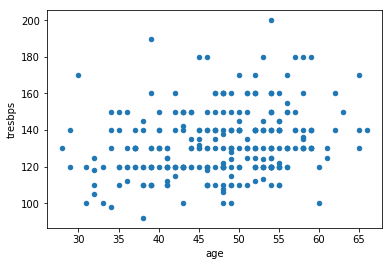

In [0]:
# Scatter Plot - Hungary
df2.plot.scatter('age', 'tresbps');

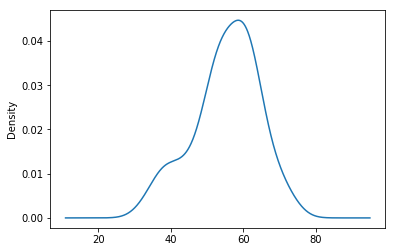

In [0]:
# Density Plot - Switzerland 
df['age'].plot.kde();

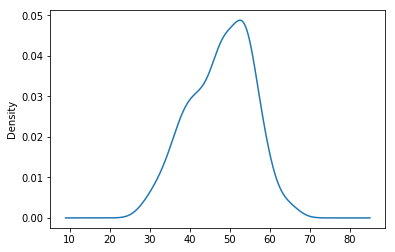

In [0]:
# Density Plot - Hungary
df2['age'].plot.kde();

In [0]:
# Also doing a few seaborn examples

import seaborn as sns
import matplotlib.pyplot as py
sns.set(style="whitegrid")


In [0]:
df.head()

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32,1,1,95.0,0,NaN,0.0,127.0,0.0,0.7,1.0,NaN,NaN,1
1,34,1,4,115.0,0,NaN,NaN,154.0,0.0,0.2,1.0,NaN,NaN,1
2,35,1,4,NaN,0,NaN,0.0,130.0,1.0,NaN,NaN,NaN,7.0,3
3,36,1,4,110.0,0,NaN,0.0,125.0,1.0,1.0,2.0,NaN,6.0,1
4,38,0,4,105.0,0,NaN,0.0,166.0,0.0,2.8,1.0,NaN,NaN,2


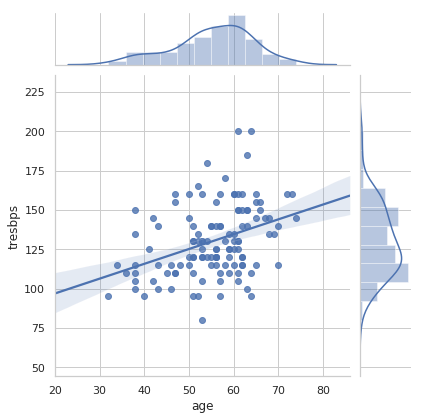

In [0]:
# Trying it with seaborn.  Doing it with a scatterplot, with a regression line.

# age = age
# tresbps = resting blood pressure

sns.jointplot(x="age", y="tresbps", data=df, kind='reg');

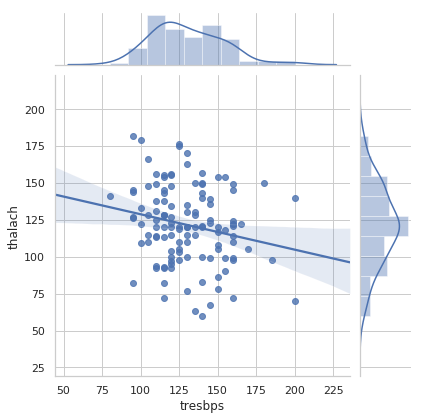

In [0]:
# Same style of plot, with different variables.

# tresbps = resting blood pressure
# thalach = maximum heart rate achieved 

sns.jointplot(x='tresbps', y='thalach', data=df, kind='reg');

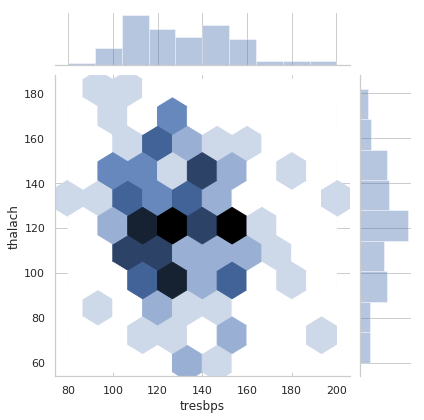

In [0]:
# Now let's do it for hexagons.
sns.jointplot(x='tresbps', y='thalach', data=df, kind='hex');

## Stretch Goals - Other types and sources of data

Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.